### Table of Content

1. [Libraries](#lib)
2. [Gather Data](#gather)
3. [Assessing Data](#ass)
4. [Quality](#qua)
5. [Tidiness](#tid)
6. [Clean](#clean)
7. [Analysis and Visualization](#anal)

## WE RATE DOGS DATA WRANGLING AND VISUALIZATION

#### Libraries
<a id="lib"><a/>

In [18]:
#Libraries to be used
import pandas as pd
from IPython.display import Image
import re
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import json
import requests
from datetime import date
import tweepy

### Gather Data
<a id="gather"><a/>

#### twitter archive
1. Directly download the WeRateDogs Twitter archive data 


In [19]:
link = "https://d17h27t6h515a5.cloudfront.net/topher/2017/August/59a4e958_twitter-archive-enhanced/twitter-archive-enhanced.csv"
twitter_archive = pd.read_csv(link)

In [20]:
# save twtter_archive to csv
twitter_archive.to_csv("twitter-archive-enhanced.csv", index = False)

#### Image Prediction Data
use the requests Library to download the tweet image preidiction and write it to image_predictions.tsv

In [21]:
url = 'https://d17h27t6h515a5.cloudfront.net/topher/2017/August/599fd2ad_image-predictions/image-predictions.tsv'
response = requests.get(url)

In [22]:
#create file
with open('image_predictions.tsv', mode='wb') as file:
    file.write(response.content)

In [23]:
#Import the tweet image predictions TSV file into a DataFrame
image_prediction = pd.read_csv('image_predictions.tsv', sep='\t')

### Twitter API

In [24]:
tweet = []

# Read the .txt file line by line into a list of dictionaries
for line in open('tweet-json.txt', 'r'):
    twitter_data = json.loads(line)
    tweet.append({'tweet_id': twitter_data['id_str'],
                        'retweet_count': twitter_data['retweet_count'],
                        'favorite_count': twitter_data['favorite_count'],
                        'followers_count': twitter_data['user']['followers_count']})
    

In [25]:
# Convert the list of dictionaries to a pandas DataFrame
tweet_df = pd.DataFrame(tweet, columns = ['tweet_id', 'retweet_count', 'favorite_count', 'followers_count'])


### Assessing Data
<a id="ass"><a/>

#### Twitter Archive Data


In [26]:
# check the first five rows
twitter_archive.head()

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,None,None,None,None
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,None,None,None,None
2,891815181378084864,NaN,NaN,2017-07-31 00:18:03 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891815181...,12,10,Archie,None,None,None,None
3,891689557279858688,NaN,NaN,2017-07-30 15:58:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891689557...,13,10,Darla,None,None,None,None
4,891327558926688256,NaN,NaN,2017-07-29 16:00:24 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891327558...,12,10,Franklin,None,None,None,None


In [27]:
# check the last five rows
twitter_archive.tail()

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
2351,666049248165822465,NaN,NaN,2015-11-16 00:24:50 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Here we have a 1949 1st generation vulpix. Enj...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666049248...,5,10,None,None,None,None,None
2352,666044226329800704,NaN,NaN,2015-11-16 00:04:52 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is a purebred Piers Morgan. Loves to Netf...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666044226...,6,10,a,None,None,None,None
2353,666033412701032449,NaN,NaN,2015-11-15 23:21:54 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Here is a very happy pup. Big fan of well-main...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666033412...,9,10,a,None,None,None,None
2354,666029285002620928,NaN,NaN,2015-11-15 23:05:30 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is a western brown Mitsubishi terrier. Up...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666029285...,7,10,a,None,None,None,None
2355,666020888022790149,NaN,NaN,2015-11-15 22:32:08 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Here we have a Japanese Irish Setter. Lost eye...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666020888...,8,10,None,None,None,None,None


In [28]:
# Inspect the data
print(twitter_archive.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2356 entries, 0 to 2355
Data columns (total 17 columns):
tweet_id                      2356 non-null int64
in_reply_to_status_id         78 non-null float64
in_reply_to_user_id           78 non-null float64
timestamp                     2356 non-null object
source                        2356 non-null object
text                          2356 non-null object
retweeted_status_id           181 non-null float64
retweeted_status_user_id      181 non-null float64
retweeted_status_timestamp    181 non-null object
expanded_urls                 2297 non-null object
rating_numerator              2356 non-null int64
rating_denominator            2356 non-null int64
name                          2356 non-null object
doggo                         2356 non-null object
floofer                       2356 non-null object
pupper                        2356 non-null object
puppo                         2356 non-null object
dtypes: float64(4), int64(3), ob

In [29]:
# check random sample
twitter_archive.sample(10)

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
1418,698355670425473025,NaN,NaN,2016-02-13 03:59:01 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Jessiga. She's a Tasmanian McCringlebe...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/698355670...,10,10,Jessiga,None,None,None,None
366,828801551087042563,NaN,NaN,2017-02-07 03:04:22 +0000,"<a href=""http://twitter.com/download/iphone"" r...",RT @dog_rates: This is Gus. He likes to be clo...,8.102541e+17,4.196984e+09,2016-12-17 22:43:27 +0000,https://twitter.com/dog_rates/status/810254108...,12,10,Gus,None,None,None,None
1026,746131877086527488,NaN,NaN,2016-06-24 00:04:36 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Gustav. He has claimed that plant. It ...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/746131877...,10,10,Gustav,None,None,None,None
1497,692423280028966913,6.924173e+17,4.196984e+09,2016-01-27 19:05:49 +0000,"<a href=""http://twitter.com/download/iphone"" r...",PUPDATE: just noticed this dog has some extra ...,NaN,NaN,NaN,NaN,9,10,None,None,None,None,None
1940,673716320723169284,6.737159e+17,4.196984e+09,2015-12-07 04:11:02 +0000,"<a href=""http://twitter.com/download/iphone"" r...",The millennials have spoken and we've decided ...,NaN,NaN,NaN,NaN,1,10,None,None,None,None,None
2337,666268910803644416,NaN,NaN,2015-11-16 14:57:41 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Very concerned about fellow dog trapped in com...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666268910...,10,10,None,None,None,None,None
1267,709566166965075968,NaN,NaN,2016-03-15 02:25:31 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Olaf. He's gotta be rare. Seems sturdy...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/709566166...,12,10,Olaf,None,None,None,None
143,864197398364647424,NaN,NaN,2017-05-15 19:14:50 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Paisley. She ate a flower just to prov...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/864197398...,13,10,Paisley,None,None,None,None
1830,676219687039057920,NaN,NaN,2015-12-14 01:58:31 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Kenneth. He's stuck in a bubble. 10/10...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/676219687...,10,10,Kenneth,None,None,None,None
1394,700002074055016451,NaN,NaN,2016-02-17 17:01:14 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Thumas. He covered himself in nanners ...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/700002074...,9,10,Thumas,None,None,None,None


In [30]:
# count the missing rows
print(twitter_archive.isna().sum())

tweet_id                         0
in_reply_to_status_id         2278
in_reply_to_user_id           2278
timestamp                        0
source                           0
text                             0
retweeted_status_id           2175
retweeted_status_user_id      2175
retweeted_status_timestamp    2175
expanded_urls                   59
rating_numerator                 0
rating_denominator               0
name                             0
doggo                            0
floofer                          0
pupper                           0
puppo                            0
dtype: int64


In [31]:
# check for duplicate values
print(twitter_archive.duplicated().sum())

0


In [32]:
# count the number of unique values
print(twitter_archive.nunique())

tweet_id                      2356
in_reply_to_status_id           77
in_reply_to_user_id             31
timestamp                     2356
source                           4
text                          2356
retweeted_status_id            181
retweeted_status_user_id        25
retweeted_status_timestamp     181
expanded_urls                 2218
rating_numerator                40
rating_denominator              18
name                           957
doggo                            2
floofer                          2
pupper                           2
puppo                            2
dtype: int64


In [33]:
# summary statistics
twitter_archive.describe()

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,retweeted_status_id,retweeted_status_user_id,rating_numerator,rating_denominator
count,2.356000e+03,7.800000e+01,7.800000e+01,1.810000e+02,1.810000e+02,2356.000000,2356.000000
mean,7.427716e+17,7.455079e+17,2.014171e+16,7.720400e+17,1.241698e+16,13.126486,10.455433
std,6.856705e+16,7.582492e+16,1.252797e+17,6.236928e+16,9.599254e+16,45.876648,6.745237
min,6.660209e+17,6.658147e+17,1.185634e+07,6.661041e+17,7.832140e+05,0.000000,0.000000
25%,6.783989e+17,6.757419e+17,3.086374e+08,7.186315e+17,4.196984e+09,10.000000,10.000000
50%,7.196279e+17,7.038708e+17,4.196984e+09,7.804657e+17,4.196984e+09,11.000000,10.000000
75%,7.993373e+17,8.257804e+17,4.196984e+09,8.203146e+17,4.196984e+09,12.000000,10.000000
max,8.924206e+17,8.862664e+17,8.405479e+17,8.874740e+17,7.874618e+17,1776.000000,170.000000


#### Assessing Image prediction data

In [34]:
# count the missing rows
print(image_prediction.isna().sum())

tweet_id    0
jpg_url     0
img_num     0
p1          0
p1_conf     0
p1_dog      0
p2          0
p2_conf     0
p2_dog      0
p3          0
p3_conf     0
p3_dog      0
dtype: int64


In [35]:
# Check for duplicated values
print(image_prediction.duplicated().sum())

0


In [36]:
# summary statistics
image_prediction.describe()

,tweet_id,img_num,p1_conf,p2_conf,p3_conf
count,2.075000e+03,2075.000000,2075.000000,2.075000e+03,2.075000e+03
mean,7.384514e+17,1.203855,0.594548,1.345886e-01,6.032417e-02
std,6.785203e+16,0.561875,0.271174,1.006657e-01,5.090593e-02
min,6.660209e+17,1.000000,0.044333,1.011300e-08,1.740170e-10
25%,6.764835e+17,1.000000,0.364412,5.388625e-02,1.622240e-02
50%,7.119988e+17,1.000000,0.588230,1.181810e-01,4.944380e-02
75%,7.932034e+17,1.000000,0.843855,1.955655e-01,9.180755e-02
max,8.924206e+17,4.000000,1.000000,4.880140e-01,2.734190e-01


In [37]:
# inspect the data
print(image_prediction.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2075 entries, 0 to 2074
Data columns (total 12 columns):
tweet_id    2075 non-null int64
jpg_url     2075 non-null object
img_num     2075 non-null int64
p1          2075 non-null object
p1_conf     2075 non-null float64
p1_dog      2075 non-null bool
p2          2075 non-null object
p2_conf     2075 non-null float64
p2_dog      2075 non-null bool
p3          2075 non-null object
p3_conf     2075 non-null float64
p3_dog      2075 non-null bool
dtypes: bool(3), float64(3), int64(2), object(4)
memory usage: 152.1+ KB
None


In [38]:
# count the unique values
print(image_prediction.nunique())

tweet_id    2075
jpg_url     2009
img_num        4
p1           378
p1_conf     2006
p1_dog         2
p2           405
p2_conf     2004
p2_dog         2
p3           408
p3_conf     2006
p3_dog         2
dtype: int64


In [39]:
# pick random rows
image_prediction.sample(8)

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
95,667550904950915073,https://pbs.twimg.com/media/CUOb_gUUkAACXdS.jpg,1,web_site,0.999335,False,vizsla,0.000081,True,collie,0.000069,True
1244,747461612269887489,https://pbs.twimg.com/media/Cl-EXHSWkAE2IN2.jpg,1,binoculars,0.192717,False,barbershop,0.085838,False,ballplayer,0.084672,False
1278,750101899009982464,https://pbs.twimg.com/media/Cmjlsh1XgAEvhq_.jpg,2,golden_retriever,0.316704,True,llama,0.174269,False,Labrador_retriever,0.147364,True
321,671855973984772097,https://pbs.twimg.com/media/CVLpciDW4AAleh-.jpg,1,chimpanzee,0.636031,False,gorilla,0.098752,False,fountain,0.031755,False
1489,782598640137187329,https://pbs.twimg.com/media/CtxZTtxUMAEduGo.jpg,1,malamute,0.840871,True,Tibetan_mastiff,0.140516,True,Eskimo_dog,0.012012,True
1054,714251586676113411,https://pbs.twimg.com/media/CemIBt4WwAQqhVV.jpg,2,soft-coated_wheaten_terrier,0.751962,True,Bedlington_terrier,0.175652,True,Great_Pyrenees,0.011452,True
1133,728409960103686147,https://pbs.twimg.com/media/ChvU_DwWMAArx5L.jpg,1,Siamese_cat,0.478278,False,Saint_Bernard,0.094246,True,king_penguin,0.082157,False
1737,821886076407029760,https://pbs.twimg.com/media/C2ftAxnWIAEUdAR.jpg,1,golden_retriever,0.266238,True,cocker_spaniel,0.223325,True,Irish_setter,0.151631,True


#### Twitter Api data

In [40]:
# inspect the data
tweet_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2354 entries, 0 to 2353
Data columns (total 4 columns):
tweet_id           2354 non-null object
retweet_count      2354 non-null int64
favorite_count     2354 non-null int64
followers_count    2354 non-null int64
dtypes: int64(3), object(1)
memory usage: 73.6+ KB


In [41]:
tweet_df.tail()

,tweet_id,retweet_count,favorite_count,followers_count
2349,666049248165822465,41,111,3201018
2350,666044226329800704,147,311,3201018
2351,666033412701032449,47,128,3201018
2352,666029285002620928,48,132,3201018
2353,666020888022790149,532,2535,3201018


In [42]:
# count the missing rows
print(tweet_df.isna().sum())

tweet_id           0
retweet_count      0
favorite_count     0
followers_count    0
dtype: int64


In [43]:
# summary statistics
tweet_df.describe()

,retweet_count,favorite_count,followers_count
count,2354.000000,2354.000000,2.354000e+03
mean,3164.797366,8080.968564,3.200942e+06
std,5284.770364,11814.771334,4.457302e+01
min,0.000000,0.000000,3.200799e+06
25%,624.500000,1415.000000,3.200898e+06
50%,1473.500000,3603.500000,3.200945e+06
75%,3652.000000,10122.250000,3.200953e+06
max,79515.000000,132810.000000,3.201018e+06


In [44]:
image_prediction['p1'].value_counts()

golden_retriever             150
Labrador_retriever           100
Pembroke                      89
Chihuahua                     83
pug                           57
chow                          44
Samoyed                       43
toy_poodle                    39
Pomeranian                    38
cocker_spaniel                30
malamute                      30
French_bulldog                26
Chesapeake_Bay_retriever      23
miniature_pinscher            23
seat_belt                     22
Staffordshire_bullterrier     20
German_shepherd               20
Siberian_husky                20
Cardigan                      19
web_site                      19
Maltese_dog                   18
teddy                         18
Shetland_sheepdog             18
Eskimo_dog                    18
beagle                        18
Lakeland_terrier              17
Shih-Tzu                      17
Rottweiler                    17
Italian_greyhound             16
kuvasz                        16
          

In [45]:
image_prediction['p2'].value_counts()

Labrador_retriever                104
golden_retriever                   92
Cardigan                           73
Chihuahua                          44
Pomeranian                         42
Chesapeake_Bay_retriever           41
French_bulldog                     41
toy_poodle                         37
cocker_spaniel                     34
Siberian_husky                     33
miniature_poodle                   33
beagle                             28
Pembroke                           27
collie                             27
Eskimo_dog                         27
kuvasz                             26
Italian_greyhound                  22
Pekinese                           21
American_Staffordshire_terrier     21
Samoyed                            20
malinois                           20
miniature_pinscher                 20
toy_terrier                        20
chow                               20
Norwegian_elkhound                 19
Boston_bull                        19
Staffordshir

In [46]:
image_prediction['p3'].value_counts()

Labrador_retriever                79
Chihuahua                         58
golden_retriever                  48
Eskimo_dog                        38
kelpie                            35
kuvasz                            34
chow                              32
Staffordshire_bullterrier         32
beagle                            31
cocker_spaniel                    31
toy_poodle                        29
Pomeranian                        29
Pekinese                          29
Great_Pyrenees                    27
Pembroke                          27
Chesapeake_Bay_retriever          27
French_bulldog                    26
malamute                          26
American_Staffordshire_terrier    24
pug                               23
Cardigan                          23
basenji                           21
bull_mastiff                      20
toy_terrier                       20
Siberian_husky                    19
Boston_bull                       17
Shetland_sheepdog                 17
d

In [47]:
# get the breed of individual dog
breed_df = image_prediction.melt(id_vars = "tweet_id",
                              var_name = "class",
                             value_name = "breed",
                             value_vars = ["p1", "p2", "p3"])

breed_df.drop(columns=["class"], inplace= True)
breed_df["breed"].value_counts()

golden_retriever                  290
Labrador_retriever                283
Chihuahua                         185
Pembroke                          143
Cardigan                          115
Pomeranian                        109
toy_poodle                        105
pug                                97
chow                               96
cocker_spaniel                     95
French_bulldog                     93
Chesapeake_Bay_retriever           91
Eskimo_dog                         83
beagle                             77
kuvasz                             76
Siberian_husky                     72
Staffordshire_bullterrier          70
Samoyed                            70
malamute                           69
Pekinese                           63
kelpie                             62
American_Staffordshire_terrier     58
miniature_pinscher                 57
Great_Pyrenees                     55
miniature_poodle                   54
collie                             51
German_sheph

In [48]:
# This is an image for tweet_id 856282028240666624
Image(url = 'https://pbs.twimg.com/media/C-If9ZwXoAAfDX2.jpg')

In [89]:
# This is an image for tweet_id 782598640137187329
Image(url = "https://pbs.twimg.com/media/CtxZTtxUMAEduGo.jpg")

In [92]:
# This is an image for tweet_id 750101899009982464
Image(url = "https://pbs.twimg.com/media/Cmjlsh1XgAEvhq_.jpg")

In [49]:
twitter_archive.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2356 entries, 0 to 2355
Data columns (total 17 columns):
tweet_id                      2356 non-null int64
in_reply_to_status_id         78 non-null float64
in_reply_to_user_id           78 non-null float64
timestamp                     2356 non-null object
source                        2356 non-null object
text                          2356 non-null object
retweeted_status_id           181 non-null float64
retweeted_status_user_id      181 non-null float64
retweeted_status_timestamp    181 non-null object
expanded_urls                 2297 non-null object
rating_numerator              2356 non-null int64
rating_denominator            2356 non-null int64
name                          2356 non-null object
doggo                         2356 non-null object
floofer                       2356 non-null object
pupper                        2356 non-null object
puppo                         2356 non-null object
dtypes: float64(4), int64(3), ob

In [50]:
twitter_archive[['rating_numerator', 'rating_denominator']].describe()

,rating_numerator,rating_denominator
count,2356.000000,2356.000000
mean,13.126486,10.455433
std,45.876648,6.745237
min,0.000000,0.000000
25%,10.000000,10.000000
50%,11.000000,10.000000
75%,12.000000,10.000000
max,1776.000000,170.000000


In [51]:
twitter_archive.rating_numerator.value_counts()

12      558
11      464
10      461
13      351
9       158
8       102
7        55
14       54
5        37
6        32
3        19
4        17
1         9
2         9
420       2
0         2
15        2
75        2
80        1
20        1
24        1
26        1
44        1
50        1
60        1
165       1
84        1
88        1
144       1
182       1
143       1
666       1
960       1
1776      1
17        1
27        1
45        1
99        1
121       1
204       1
Name: rating_numerator, dtype: int64

In [52]:
twitter_archive.rating_denominator.value_counts()

10     2333
11        3
50        3
80        2
20        2
2         1
16        1
40        1
70        1
15        1
90        1
110       1
120       1
130       1
150       1
170       1
7         1
0         1
Name: rating_denominator, dtype: int64

In [53]:
twitter_archive.name.value_counts()

None              745
a                  55
Charlie            12
Cooper             11
Lucy               11
Oliver             11
Tucker             10
Lola               10
Penny              10
Bo                  9
Winston             9
Sadie               8
the                 8
Bailey              7
Toby                7
an                  7
Daisy               7
Buddy               7
Jack                6
Jax                 6
Bella               6
Stanley             6
Oscar               6
Scout               6
Koda                6
Rusty               6
Milo                6
Dave                6
Leo                 6
Oakley              5
                 ... 
Pepper              1
Trip                1
Rodney              1
Mimosa              1
Kanu                1
such                1
Mac                 1
Miley               1
Michelangelope      1
Iroh                1
Ziva                1
Kial                1
Carter              1
Ozzie               1
Darby     

In [54]:
twitter_archive.sample(8)

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
135,866450705531457537,NaN,NaN,2017-05-22 00:28:40 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Jamesy. He gives a kiss to every other...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/866450705...,13,10,Jamesy,None,None,pupper,None
280,839549326359670784,NaN,NaN,2017-03-08 18:52:12 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Meet Winston. He knows he's a little too big f...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/839549326...,12,10,Winston,None,None,None,None
2307,666826780179869698,NaN,NaN,2015-11-18 03:54:28 +0000,"<a href=""http://twitter.com/download/iphone"" r...",12/10 simply brilliant pup https://t.co/V6ZzG4...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666826780...,12,10,None,None,None,None,None
780,775733305207554048,NaN,NaN,2016-09-13 16:30:07 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Anakin. He strives to reach his full d...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/775733305...,11,10,Anakin,doggo,None,None,None
457,818145370475810820,NaN,NaN,2017-01-08 17:20:31 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Autumn. Her favorite toy is a cheesebu...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/818145370...,11,10,Autumn,None,None,None,None
1492,692828166163931137,NaN,NaN,2016-01-28 21:54:41 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This pupper just descended from heaven. 12/10 ...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/692828166...,12,10,None,None,None,pupper,None
1071,740214038584557568,NaN,NaN,2016-06-07 16:09:13 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is getting incredibly frustrating. This i...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/740214038...,10,10,getting,None,None,None,None
475,816062466425819140,NaN,NaN,2017-01-02 23:23:48 +0000,"<a href=""http://twitter.com/download/iphone"" r...",RT @dog_rates: Meet Jack. He's one of the rare...,8.159907e+17,4.196984e+09,2017-01-02 18:38:42 +0000,https://www.gofundme.com/surgeryforjacktheminp...,11,10,Jack,None,None,None,None


## Quality
<a id="qua"><a/>

### Twitter archive table

1. Keep original ratings (no retweets) that have images
2. drop irrelevant columns
3. Wrong datatypes in the columns (tweet_id, rating_denominator,rating_numerator, in_reply_to_status_id, in_reply_to_user_id, timestamp, retweeted_status_id, retweeted_status_user_id, retweeted_status_timestamp, doggo, floofer, pupper, and puppo)
4. Correct numerators with decimals
5. Missing values in 'name' and dog stages represented as 'None'
6. Missing URLs in expanded_urls
7. Error in dog names (e.g a,an,actually) can't be a dog's name.
8. Some values in rating_numerator and rating_denominator appear to be wrong

### Image prediction table

- Wrong datatype (tweet_id column)
- Some images are missing (only 2075 counts out of possible 2356)


### Twitter API table

- Wrong datatype (tweet_id column)
- Missing tweets


### Tidiness
<a id="tid"><a/>

### Twitter archive table

* doggo, floofer, pupper and puppo columns in twitter_archive table should be merged into one column named "dog_type"

### Twitter API table

- twitter api table columns(retweet_count, favorite_count, followers_count) should be merged with twitter archive table.

### Image prediction table

- Image predictions table should be merged with twitter archive table

### Clean
<a id="clean"><a/>

In [55]:
# Make copies to preserve the original datasets
archive_clean = twitter_archive.copy()
image_clean = image_prediction.copy()
tweet_clean = tweet_df.copy()

In [56]:
archive_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2356 entries, 0 to 2355
Data columns (total 17 columns):
tweet_id                      2356 non-null int64
in_reply_to_status_id         78 non-null float64
in_reply_to_user_id           78 non-null float64
timestamp                     2356 non-null object
source                        2356 non-null object
text                          2356 non-null object
retweeted_status_id           181 non-null float64
retweeted_status_user_id      181 non-null float64
retweeted_status_timestamp    181 non-null object
expanded_urls                 2297 non-null object
rating_numerator              2356 non-null int64
rating_denominator            2356 non-null int64
name                          2356 non-null object
doggo                         2356 non-null object
floofer                       2356 non-null object
pupper                        2356 non-null object
puppo                         2356 non-null object
dtypes: float64(4), int64(3), ob

#### define
1. Merge the clean versions of df_twitter_archive, df_image_predictions, and tweet_json dataframes Correct the dog types
2. Create one column for the various dog types: doggo, floofer, pupper, puppo 
3. Remove columns no longer needed: in_reply_to_status_id, in_reply_to_user_id, retweeted_status_id, retweeted_status_user_id, and retweeted_status_timestamp
4. Delete retweets
5. Remove irrelevant columns
6. Change tweet_id from an integer to a string
7. Change the timestamp to correct datetime format
8. Correct naming issues
9. Creating a new dog_breed column using the image prediction data



#### code

In [57]:
# merge the datasets for easy wrangling and analysis
df = pd.concat([twitter_archive, image_prediction, tweet_df], join='outer', axis=1)

#### test

In [58]:
df

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,...,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog,tweet_id,retweet_count,favorite_count,followers_count
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643...,...,collie,0.156665,True,Shetland_sheepdog,0.061428,True,892420643555336193,8853.0,39467.0,3200889.0
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892177421...,...,miniature_pinscher,0.074192,True,Rhodesian_ridgeback,0.072010,True,892177421306343426,6514.0,33819.0,3200889.0
2,891815181378084864,NaN,NaN,2017-07-31 00:18:03 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891815181...,...,malinois,0.138584,True,bloodhound,0.116197,True,891815181378084864,4328.0,25461.0,3200889.0
3,891689557279858688,NaN,NaN,2017-07-30 15:58:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891689557...,...,redbone,0.360687,True,miniature_pinscher,0.222752,True,891689557279858688,8964.0,42908.0,3200889.0
4,891327558926688256,NaN,NaN,2017-07-29 16:00:24 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891327558...,...,Rottweiler,0.243682,True,Doberman,0.154629,True,891327558926688256,9774.0,41048.0,3200889.0
5,891087950875897856,NaN,NaN,2017-07-29 00:08:17 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Here we have a majestic great white breaching ...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891087950...,...,English_springer,0.263788,True,Greater_Swiss_Mountain_dog,0.016199,True,891087950875897856,3261.0,20562.0,3200889.0
6,890971913173991426,NaN,NaN,2017-07-28 16:27:12 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Meet Jax. He enjoys ice cream so much he gets ...,NaN,NaN,NaN,"https://gofundme.com/ydvmve-surgery-for-jax,ht...",...,mud_turtle,0.045885,False,terrapin,0.017885,False,890971913173991426,2158.0,12041.0,3200889.0
7,890729181411237888,NaN,NaN,2017-07-28 00:22:40 +0000,"<a href=""http://twitter.com/download/iphone"" r...",When you watch your owner call another dog a g...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/890729181...,...,Tibetan_mastiff,0.058279,True,fur_coat,0.054449,False,890729181411237888,16716.0,56848.0,3200889.0
8,890609185150312448,NaN,NaN,2017-07-27 16:25:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Zoey. She doesn't want to be one of th...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/890609185...,...,shopping_basket,0.014594,False,golden_retriever,0.007959,True,890609185150312448,4429.0,28226.0,3200889.0
9,890240255349198849,NaN,NaN,2017-07-26 15:59:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Cassie. She is a college pup. Studying...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/890240255...,...,komondor,0.192305,True,soft-coated_wheaten_terrier,0.082086,True,890240255349198849,7711.0,32467.0,3200889.0


In [59]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2356 entries, 0 to 2355
Data columns (total 33 columns):
tweet_id                      2356 non-null int64
in_reply_to_status_id         78 non-null float64
in_reply_to_user_id           78 non-null float64
timestamp                     2356 non-null object
source                        2356 non-null object
text                          2356 non-null object
retweeted_status_id           181 non-null float64
retweeted_status_user_id      181 non-null float64
retweeted_status_timestamp    181 non-null object
expanded_urls                 2297 non-null object
rating_numerator              2356 non-null int64
rating_denominator            2356 non-null int64
name                          2356 non-null object
doggo                         2356 non-null object
floofer                       2356 non-null object
pupper                        2356 non-null object
puppo                         2356 non-null object
tweet_id                      20

In [60]:
# create a new column named "breed"
df["breed"] = breed_df["breed"]
df.head()

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,...,p2_conf,p2_dog,p3,p3_conf,p3_dog,tweet_id,retweet_count,favorite_count,followers_count,breed
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643...,...,0.156665,True,Shetland_sheepdog,0.061428,True,892420643555336193,8853.0,39467.0,3200889.0,Welsh_springer_spaniel
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892177421...,...,0.074192,True,Rhodesian_ridgeback,0.072010,True,892177421306343426,6514.0,33819.0,3200889.0,redbone
2,891815181378084864,NaN,NaN,2017-07-31 00:18:03 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891815181...,...,0.138584,True,bloodhound,0.116197,True,891815181378084864,4328.0,25461.0,3200889.0,German_shepherd
3,891689557279858688,NaN,NaN,2017-07-30 15:58:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891689557...,...,0.360687,True,miniature_pinscher,0.222752,True,891689557279858688,8964.0,42908.0,3200889.0,Rhodesian_ridgeback
4,891327558926688256,NaN,NaN,2017-07-29 16:00:24 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891327558...,...,0.243682,True,Doberman,0.154629,True,891327558926688256,9774.0,41048.0,3200889.0,miniature_pinscher


In [61]:
df.columns

Index(['tweet_id', 'in_reply_to_status_id', 'in_reply_to_user_id', 'timestamp',
       'source', 'text', 'retweeted_status_id', 'retweeted_status_user_id',
       'retweeted_status_timestamp', 'expanded_urls', 'rating_numerator',
       'rating_denominator', 'name', 'doggo', 'floofer', 'pupper', 'puppo',
       'tweet_id', 'jpg_url', 'img_num', 'p1', 'p1_conf', 'p1_dog', 'p2',
       'p2_conf', 'p2_dog', 'p3', 'p3_conf', 'p3_dog', 'tweet_id',
       'retweet_count', 'favorite_count', 'followers_count', 'breed'],
      dtype='object')

#### Define 
Create one column for the various dog types: doggo, floofer, pupper, puppo

#### Code

In [62]:
#  Extract the text from the columns into the new dog_type colunn
df['dog_type'] = df['text'].str.extract('(doggo|floofer|pupper|puppo)')

#### Test

In [63]:
df.sample(10)

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,...,p2_dog,p3,p3_conf,p3_dog,tweet_id,retweet_count,favorite_count,followers_count,breed,dog_type
2060,671182547775299584,NaN,NaN,2015-11-30 04:22:44 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This pup holds the secrets of the universe in ...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/671182547...,...,True,redbone,0.007958,True,671163268581498880,1198.0,1763.0,3201008.0,golden_retriever,NaN
1725,680070545539371008,NaN,NaN,2015-12-24 17:00:27 +0000,"<a href=""https://about.twitter.com/products/tw...",Say hello to Emmie. She's trapped in an orname...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/680070545...,...,False,crane,0.000002,False,679877062409191424,726.0,2155.0,3200953.0,school_bus,NaN
1737,679530280114372609,NaN,NaN,2015-12-23 05:13:38 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Guys this really needs to stop. We've been ove...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/679530280...,...,True,Irish_setter,0.151631,True,679511351870550016,1461.0,3711.0,3200953.0,golden_retriever,NaN
100,872820683541237760,NaN,NaN,2017-06-08 14:20:41 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Here are my favorite #dogsatpollingstations \n...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/872820683...,...,False,African_grey,0.054247,False,872668790621863937,31.0,0.0,3200891.0,lorikeet,NaN
592,798933969379225600,NaN,NaN,2016-11-16 17:01:16 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Iroh. He's in a predicament. 12/10 som...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/798933969...,...,True,soft-coated_wheaten_terrier,0.046745,True,798925684722855936,1663.0,8246.0,3200898.0,toy_poodle,NaN
46,883360690899218434,NaN,NaN,2017-07-07 16:22:55 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Meet Grizzwald. He may be the floofiest floofe...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/883360690...,...,True,Ibizan_hound,0.057461,True,883117836046086144,6949.0,37914.0,3200890.0,English_setter,floofer
2269,667509364010450944,NaN,NaN,2015-11-20 01:06:48 +0000,"<a href=""http://twitter.com"" rel=""nofollow"">Tw...",This a Norwegian Pewterschmidt named Tickles. ...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/667509364...,...,NaN,NaN,NaN,NaN,667495797102141441,294.0,565.0,3201016.0,miniature_schnauzer,NaN
2270,667502640335572993,NaN,NaN,2015-11-20 00:40:05 +0000,"<a href=""http://twitter.com"" rel=""nofollow"">Tw...",Say hello to Hall and Oates. Oates is winking ...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/667502640...,...,NaN,NaN,NaN,NaN,667491009379606528,242.0,559.0,3201016.0,lampshade,NaN
1311,707021089608753152,NaN,NaN,2016-03-08 01:52:18 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Tucker. He's a Dasani Episcopalian. Go...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/707021089...,...,True,English_foxhound,0.016246,True,706904523814649856,8830.0,15961.0,3200947.0,beagle,NaN
528,808501579447930884,NaN,NaN,2016-12-13 02:39:32 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Koda. He dug a hole and then sat in it...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/808501579...,...,False,microwave,0.038110,False,808344865868283904,24069.0,47281.0,3200896.0,doormat,NaN


In [64]:
df["dog_type"].value_counts()

pupper     265
doggo       93
puppo       37
floofer      4
Name: dog_type, dtype: int64

#### Define
Delete retweet

#### Code

In [65]:
df = df[np.isnan(df['retweeted_status_id'])]

#### Test

In [66]:
# Confirm the changes
print(df.info())

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2175 entries, 0 to 2355
Data columns (total 35 columns):
tweet_id                      2175 non-null int64
in_reply_to_status_id         78 non-null float64
in_reply_to_user_id           78 non-null float64
timestamp                     2175 non-null object
source                        2175 non-null object
text                          2175 non-null object
retweeted_status_id           0 non-null float64
retweeted_status_user_id      0 non-null float64
retweeted_status_timestamp    0 non-null object
expanded_urls                 2117 non-null object
rating_numerator              2175 non-null int64
rating_denominator            2175 non-null int64
name                          2175 non-null object
doggo                         2175 non-null object
floofer                       2175 non-null object
pupper                        2175 non-null object
puppo                         2175 non-null object
tweet_id                      1896 non

#### Define
Remove irrelevant columns

#### Code

In [67]:
df = df.drop( columns =['retweeted_status_id','retweeted_status_user_id','doggo', 'floofer', 'puppo', 
                        'retweeted_status_timestamp', 'p1', 'p2', 'p3', 'in_reply_to_status_id'])

#### Test

In [68]:
# Confirm the changes
df.columns

Index(['tweet_id', 'in_reply_to_user_id', 'timestamp', 'source', 'text',
       'expanded_urls', 'rating_numerator', 'rating_denominator', 'name',
       'pupper', 'tweet_id', 'jpg_url', 'img_num', 'p1_conf', 'p1_dog',
       'p2_conf', 'p2_dog', 'p3_conf', 'p3_dog', 'tweet_id', 'retweet_count',
       'favorite_count', 'followers_count', 'breed', 'dog_type'],
      dtype='object')

In [69]:
# Drop more irrelevant columns
df.drop(columns = ['source', 'img_num', 'pupper', 'in_reply_to_user_id'], inplace=True)

In [70]:
df.columns

Index(['tweet_id', 'timestamp', 'text', 'expanded_urls', 'rating_numerator',
       'rating_denominator', 'name', 'tweet_id', 'jpg_url', 'p1_conf',
       'p1_dog', 'p2_conf', 'p2_dog', 'p3_conf', 'p3_dog', 'tweet_id',
       'retweet_count', 'favorite_count', 'followers_count', 'breed',
       'dog_type'],
      dtype='object')

#### Define
Remove duplicated columns

#### Code

In [71]:
df = df.loc[:,~df.columns.duplicated()]

#### Test

In [72]:
# confirm the changes
df.head()

,tweet_id,timestamp,text,expanded_urls,rating_numerator,rating_denominator,name,jpg_url,p1_conf,p1_dog,p2_conf,p2_dog,p3_conf,p3_dog,retweet_count,favorite_count,followers_count,breed,dog_type
0,892420643555336193,2017-08-01 16:23:56 +0000,This is Phineas. He's a mystical boy. Only eve...,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,0.465074,True,0.156665,True,0.061428,True,8853.0,39467.0,3200889.0,Welsh_springer_spaniel,NaN
1,892177421306343426,2017-08-01 00:17:27 +0000,This is Tilly. She's just checking pup on you....,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,0.506826,True,0.074192,True,0.072010,True,6514.0,33819.0,3200889.0,redbone,NaN
2,891815181378084864,2017-07-31 00:18:03 +0000,This is Archie. He is a rare Norwegian Pouncin...,https://twitter.com/dog_rates/status/891815181...,12,10,Archie,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,0.596461,True,0.138584,True,0.116197,True,4328.0,25461.0,3200889.0,German_shepherd,NaN
3,891689557279858688,2017-07-30 15:58:51 +0000,This is Darla. She commenced a snooze mid meal...,https://twitter.com/dog_rates/status/891689557...,13,10,Darla,https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg,0.408143,True,0.360687,True,0.222752,True,8964.0,42908.0,3200889.0,Rhodesian_ridgeback,NaN
4,891327558926688256,2017-07-29 16:00:24 +0000,This is Franklin. He would like you to stop ca...,https://twitter.com/dog_rates/status/891327558...,12,10,Franklin,https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg,0.560311,True,0.243682,True,0.154629,True,9774.0,41048.0,3200889.0,miniature_pinscher,NaN


#### Define
Change data types

#### Code

In [73]:
df["tweet_id"] = df["tweet_id"].astype(str)

# Remove the time zone from the 'timestamp' column
df['timestamp'] = df['timestamp'].str.slice(start=0, stop=-6)

# convert 'timestamp' column to a datetime object
df['timestamp'] = pd.to_datetime(df['timestamp'], format = "%Y-%m-%d %H:%M:%S")

#### Test

In [74]:
df.dtypes

tweet_id                      object
timestamp             datetime64[ns]
text                          object
expanded_urls                 object
rating_numerator               int64
rating_denominator             int64
name                          object
jpg_url                       object
p1_conf                      float64
p1_dog                        object
p2_conf                      float64
p2_dog                        object
p3_conf                      float64
p3_dog                        object
retweet_count                float64
favorite_count               float64
followers_count              float64
breed                         object
dog_type                      object
dtype: object

#### Define
correct naming issues

#### Code

In [75]:
df['name'] = df.name.str.replace('^[a-z]+', 'None')

#### Test

In [76]:
df["name"].value_counts()

None         784
Lucy          11
Charlie       11
Cooper        10
Oliver        10
Tucker         9
Penny          9
Sadie          8
Lola           8
Winston        8
Daisy          7
Toby           7
Koda           6
Jax            6
Bailey         6
Bo             6
Stanley        6
Oscar          6
Bella          6
Bentley        5
Dave           5
Louis          5
Buddy          5
Rusty          5
Leo            5
Chester        5
Milo           5
Scout          5
Bear           4
Gary           4
            ... 
Meera          1
Thor           1
Stephan        1
Jangle         1
Dido           1
Poppy          1
Julius         1
Willy          1
Callie         1
Bookstore      1
Darla          1
Ralphus        1
Asher          1
Angel          1
Arnold         1
Molly          1
Shikha         1
Pip            1
Pluto          1
Bell           1
Aubie          1
Hazel          1
Banditt        1
Newt           1
Gustav         1
Rascal         1
Caryl          1
Kane          

# Save cleaned data

In [77]:
df.to_csv('twitter_archive_master.csv', index=False)

### Analysis and visualization
<a id="anal"><a/>

In [78]:
# Load the dataset into pandas DataFrame
df = pd.read_csv('twitter_archive_master.csv')

In [79]:
# inspect the data
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2175 entries, 0 to 2174
Data columns (total 19 columns):
tweet_id              2175 non-null int64
timestamp             2175 non-null object
text                  2175 non-null object
expanded_urls         2117 non-null object
rating_numerator      2175 non-null int64
rating_denominator    2175 non-null int64
name                  2175 non-null object
jpg_url               1896 non-null object
p1_conf               1896 non-null float64
p1_dog                1896 non-null object
p2_conf               1896 non-null float64
p2_dog                1896 non-null object
p3_conf               1896 non-null float64
p3_dog                1896 non-null object
retweet_count         2173 non-null float64
favorite_count        2173 non-null float64
followers_count       2173 non-null float64
breed                 2175 non-null object
dog_type              364 non-null object
dtypes: float64(6), int64(3), object(10)
memory usage: 322.9+ KB


In [80]:
df["dog_type"].value_counts()

pupper     244
doggo       84
puppo       32
floofer      4
Name: dog_type, dtype: int64

* Pupper is the most common dog type

In [81]:
df["breed"].value_counts()

golden_retriever             151
Labrador_retriever            96
Chihuahua                     84
Pembroke                      82
pug                           60
chow                          42
toy_poodle                    41
Samoyed                       41
Pomeranian                    38
miniature_pinscher            31
cocker_spaniel                30
malamute                      29
French_bulldog                29
Chesapeake_Bay_retriever      29
Cardigan                      25
beagle                        24
Siberian_husky                23
Staffordshire_bullterrier     21
seat_belt                     21
German_shepherd               20
Lakeland_terrier              19
Eskimo_dog                    19
Italian_greyhound             19
Rottweiler                    18
teddy                         17
kuvasz                        17
web_site                      17
Pekinese                      15
Maltese_dog                   15
Shetland_sheepdog             15
          

In [82]:
breed_prop = df["breed"].value_counts(normalize = True).sort_values()
breed_prop

minibus                      0.000460
nail                         0.000460
mortarboard                  0.000460
grey_fox                     0.000460
trombone                     0.000460
handkerchief                 0.000460
flamingo                     0.000460
timber_wolf                  0.000460
carton                       0.000460
alp                          0.000460
paper_towel                  0.000460
fountain                     0.000460
jersey                       0.000460
damselfly                    0.000460
agama                        0.000460
coffee_mug                   0.000460
suit                         0.000460
school_bus                   0.000460
traffic_light                0.000460
binoculars                   0.000460
peacock                      0.000460
lorikeet                     0.000460
shopping_basket              0.000460
radio_telescope              0.000460
fiddler_crab                 0.000460
lion                         0.000460
remote_contr

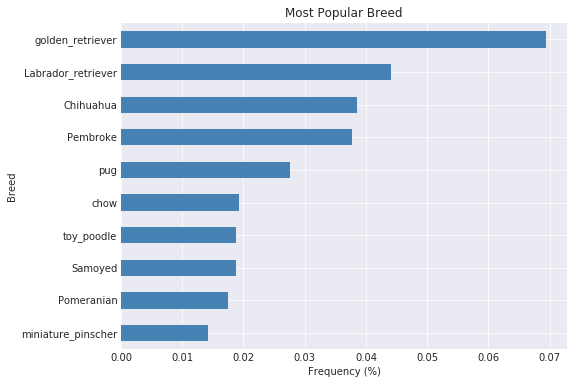

In [83]:
# Set figure size
plt.rcParams['figure.figsize'] = 8, 6

# Set style 
sns.set_style("darkgrid")

breed_prop.tail(10).plot(kind="barh", color='steelblue')
plt.xlabel("Frequency (%)")
plt.ylabel("Breed")
plt.title("Most Popular Breed");

* Golden retriever is the most popular breed           

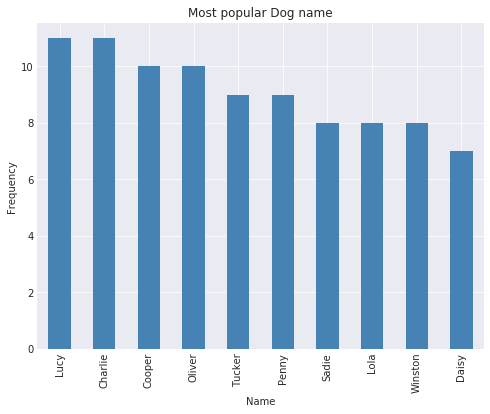

In [84]:
pname = df.name.value_counts()
# plot
pname[1:11].plot(kind = 'bar', color = 'steelblue')

# Set title
plt.title('Most popular Dog name')

# Add axes labels
plt.xlabel('Name')
plt.ylabel('Frequency');

`Charlie` is the most popular dog name.

In [85]:
df['favorite_count'].corr(df['retweet_count'])

0.71439645114563255

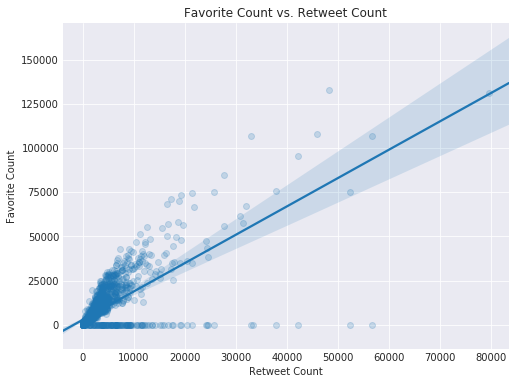

In [86]:
# Scatterplot of retweets vs favorite count
sns.regplot(x="retweet_count", 
           y="favorite_count", 
           data=df,
           scatter_kws={'alpha':0.2})

plt.title('Favorite Count vs. Retweet Count')
plt.xlabel('Retweet Count')
plt.ylabel('Favorite Count');

Favorite count and retweet count are positively correlated.

In [87]:
df.timestamp = pd.to_datetime(df['timestamp'], format='%Y-%m-%d %H:%M:%S.%f')

monthly_df = df.groupby(pd.Grouper(key = 'timestamp', freq = "M")).count().reset_index()
monthly_df = monthly_df[['timestamp', 'tweet_id']]
monthly_df.head()
monthly_df.sum()

tweet_id    2175
dtype: int64

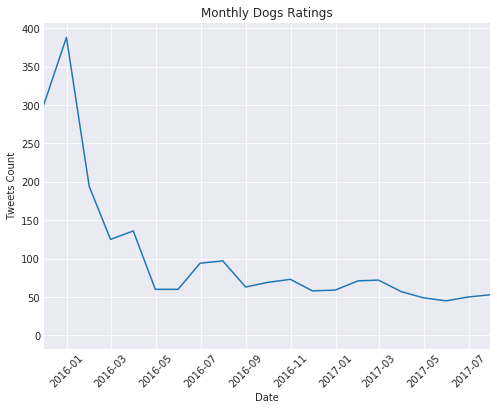

In [88]:
# Plotting time vs. tweets
plt.xlim([date(2015, 11, 30), date(2017, 7, 30)]);
plt.plot(monthly_df.timestamp, monthly_df.tweet_id)

# Set title
plt.title('Monthly Dogs Ratings')

# rotate x_axis
plt.xticks(rotation = 45)

# Label the axes
plt.xlabel('Date')
plt.ylabel('Tweets Count');

* Over time tweets declined sharply, with spikes in activity during the early 2016 January, 2016 march, and generally have been following a downward trend since.